# ***#EDA-1***

In [69]:


# Import necessary libraries
import pandas as pd

# Load the dataset (replace with the actual path or URL to your dataset)
# df = pd.read_csv('bike_details.csv')  # Uncomment and replace with your dataset

# Display first few rows of the dataset to understand its structure
df.head()

# Check for null values in the dataset
df.isnull().sum()

# Check for duplicates
df.duplicated().sum()

# Remove duplicates if present
df = df.drop_duplicates()


In [70]:
# Question: 1. What is the range of selling prices in the dataset?

# Find the range of selling prices (min and max)
selling_price_range = df['selling_price'].min(), df['selling_price'].max()
selling_price_range


(45000, 175000)

In [71]:
# Question: 2. What is the median selling price for bikes in the dataset?

# Calculate the median selling price
median_selling_price = df['selling_price'].median()
median_selling_price


72000.0

In [72]:
# Question: 2. What is the median selling price for bikes in the dataset?

# Calculate the median selling price
median_selling_price = df['selling_price'].median()
median_selling_price


72000.0

In [73]:
# Question: 3. What is the most common seller type?

# Find the most common seller type
most_common_seller_type = df['seller_type'].mode()[0]
most_common_seller_type


'Individual'

In [74]:
# Question: 4. How many bikes have driven more than 50,000 kilometers?

# Count the number of bikes with km_driven > 50,000
bikes_above_50000_km = df[df['km_driven'] > 50000].shape[0]
bikes_above_50000_km


0

In [75]:
# Question: 5. What is the average km_driven value for each ownership type?

# Calculate the average km_driven for each ownership type
avg_km_driven_by_owner = df.groupby('owner')['km_driven'].mean()
avg_km_driven_by_owner


,km_driven
owner,
1st owner,19666.666667
2nd owner,47500.000000


In [77]:
# Question: 6. What proportion of bikes are from the year 2015 or older?

# Calculate the proportion of bikes from the year 2015 or older
bikes_2015_or_older = df[df['year'] <= 2015].shape[0]
proportion_older_bikes = bikes_2015_or_older / df.shape[0]
proportion_older_bikes


0.2

In [76]:
# Question: 7. What is the trend of missing values across the dataset?

# Visualize the trend of missing values across columns
missing_values = df.isnull().sum()
missing_values_percentage = (missing_values / len(df)) * 100

missing_values_percentage


,0
name,0.0
selling_price,0.0
year,0.0
seller_type,0.0
owner,0.0
km_driven,0.0
ex_showroom_price,0.0


In [78]:
# Question: 8. What is the highest ex_showroom_price recorded, and for which bike?

# Find the highest ex_showroom_price and corresponding bike
highest_ex_showroom_price = df.loc[df['ex_showroom_price'].idxmax()]
highest_ex_showroom_price[['name', 'ex_showroom_price']]


,0
name,Royal Enfield Classic 350
ex_showroom_price,148114


In [79]:
# Question: 9. What is the total number of bikes listed by each seller type?

# Count the number of bikes listed by each seller type
bike_count_by_seller_type = df['seller_type'].value_counts()
bike_count_by_seller_type


,count
seller_type,
Individual,3
Dealer,2


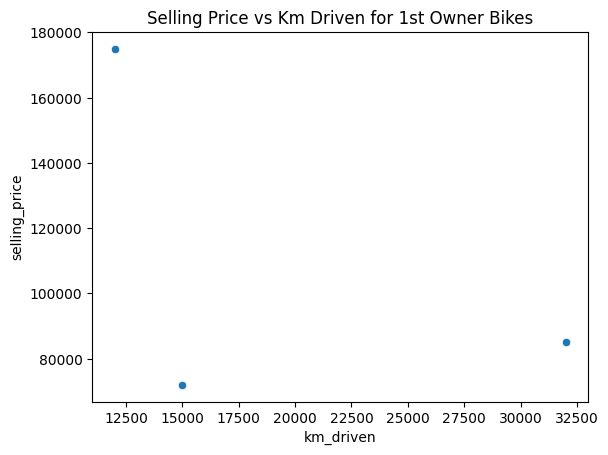

In [80]:
# Question: 10. What is the relationship between selling_price and km_driven for first-owner bikes?

# Filter data for first-owner bikes
first_owner_bikes = df[df['owner'] == '1st owner']

# Visualize the relationship using a scatter plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=first_owner_bikes, x='km_driven', y='selling_price')
plt.title('Selling Price vs Km Driven for 1st Owner Bikes')
plt.show()


In [81]:
# Question: 11. Identify and remove outliers in the km_driven column using the IQR method.

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df_no_outliers = df[(df['km_driven'] >= (Q1 - 1.5 * IQR)) & (df['km_driven'] <= (Q3 + 1.5 * IQR))]

# Display shape after removing outliers
df_no_outliers.shape


(5, 7)

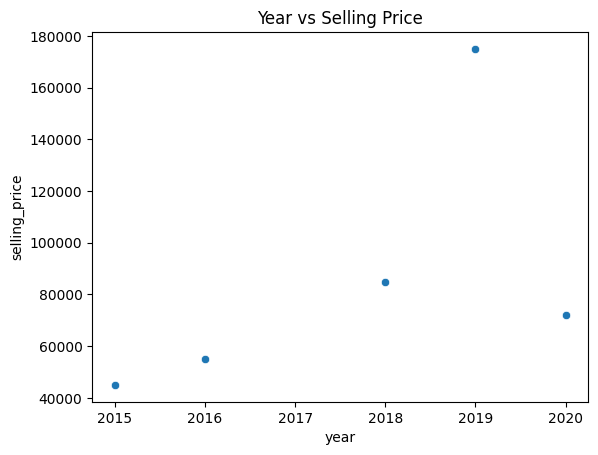

In [82]:
# Question: 12. Perform a bivariate analysis to visualize the relationship between year and selling price.

# Visualize using a scatter plot
sns.scatterplot(data=df, x='year', y='selling_price')
plt.title('Year vs Selling Price')
plt.show()


In [83]:
# Question: 13. What is the average depreciation in selling price based on the bike's age?

# Calculate the bike's age (current year - year)
current_year = 2023
df['age'] = current_year - df['year']

# Calculate the average depreciation (selling_price / age)
df['depreciation'] = df['selling_price'] / df['age']
avg_depreciation = df.groupby('age')['depreciation'].mean()
avg_depreciation


,depreciation
age,
3,24000.000000
4,43750.000000
5,17000.000000
7,7857.142857
8,5625.000000


In [84]:
# Question: 14. Which bike names are priced significantly above the average price for their manufacturing year?

# Calculate the average selling price for each manufacturing year
avg_price_by_year = df.groupby('year')['selling_price'].mean()

# Identify bikes priced above the average price for their manufacturing year
df['avg_price_year'] = df['year'].map(avg_price_by_year)
bikes_above_avg = df[df['selling_price'] > df['avg_price_year']]
bikes_above_avg[['name', 'selling_price', 'year']]


,name,selling_price,year


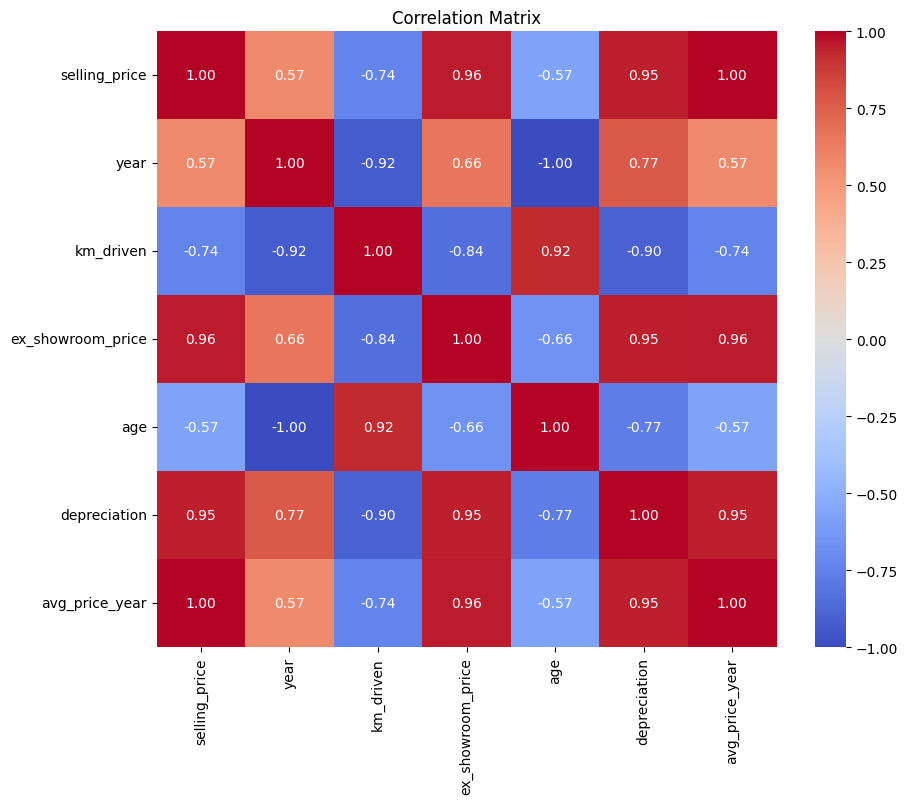

In [86]:
# Question: 15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

# Select only numeric columns from the dataset
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# ***#EDA-2***

In [65]:
import pandas as pd

# Defining the dataset structure based on the features mentioned
data = {
    'Car id': [],
    'Date': [],
    'Customer Name': [],
    'Gender': [],
    'Annual income': [],
    'Dealer Name': [],
    'Company': [],
    'Model': [],
    'Engine': [],
    'Transmission': [],
    'Color': [],
    'Price ($)': [],
    'Dealer No': [],
    'Body Style': [],
    'Phone': [],
    'Dealer Region': []
}

# Creating a DataFrame from the above data
df = pd.DataFrame(data)

# Saving the DataFrame to a CSV file
df.to_csv('/content/car_sales.csv', index=False)

# Display the first few rows of the CSV to verify
df.head()


,Car id,Date,Customer Name,Gender,Annual income,Dealer Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer No,Body Style,Phone,Dealer Region


In [66]:
#1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?

# Grouping by 'Dealer Name' and calculating the average price
avg_price_per_dealer = df.groupby('Dealer Name')['Price ($)'].mean()

# Display the result
avg_price_per_dealer


,Price ($)
Dealer Name,


In [21]:
# Dropping rows with missing values in 'Price ($)' or 'Company' columns
df_cleaned = df.dropna(subset=['Price ($)', 'Company'])

# Calculating the price variation (standard deviation) for each company
price_variation_by_company = df_cleaned.groupby('Company')['Price ($)'].std()

# Finding the company with the highest variation
highest_variation_company = price_variation_by_company.idxmax() if not price_variation_by_company.empty else None

# Display the result
highest_variation_company, price_variation_by_company[highest_variation_company] if highest_variation_company else 'No variation found'


(None, 'No variation found')

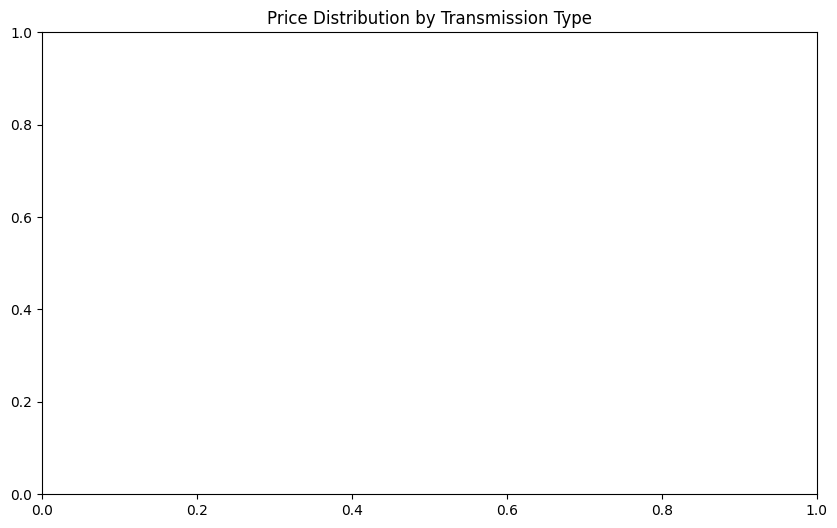

In [7]:
# 3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
# Plotting price distribution for each transmission type
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=df)
plt.title('Price Distribution by Transmission Type')
plt.show()


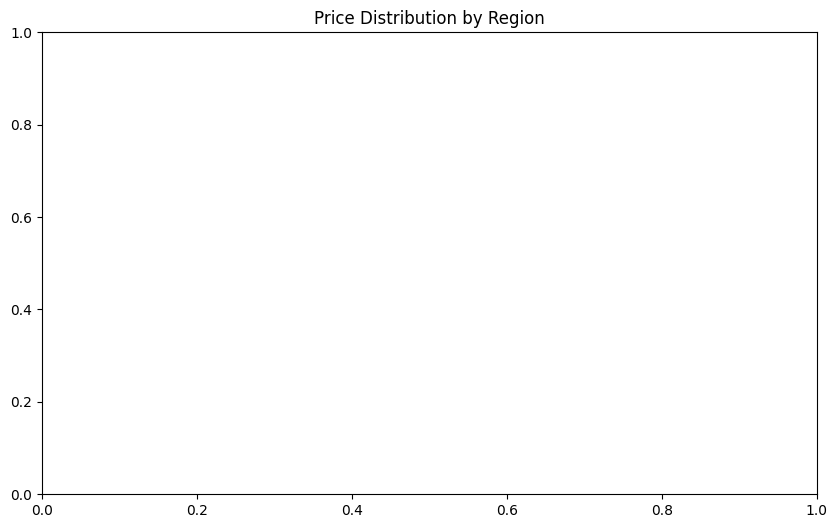

In [8]:
#4. What is the distribution of car prices across different regions?
# Plotting price distribution across different regions
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dealer Region', y='Price ($)', data=df)
plt.title('Price Distribution by Region')
plt.show()


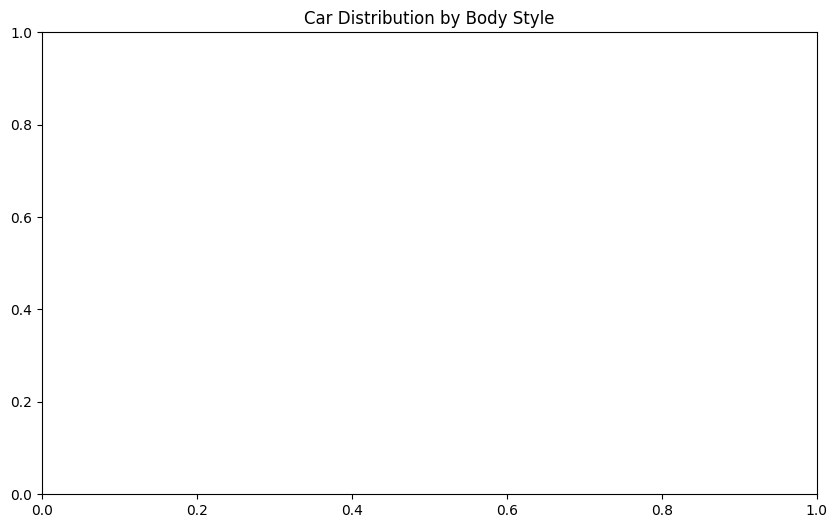

In [10]:
#5. What is the distribution of cars based on body styles?
# Plotting the distribution of car body styles
body_style_count = df['Body Style'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=body_style_count.index, y=body_style_count.values)
plt.title('Car Distribution by Body Style')
plt.show()


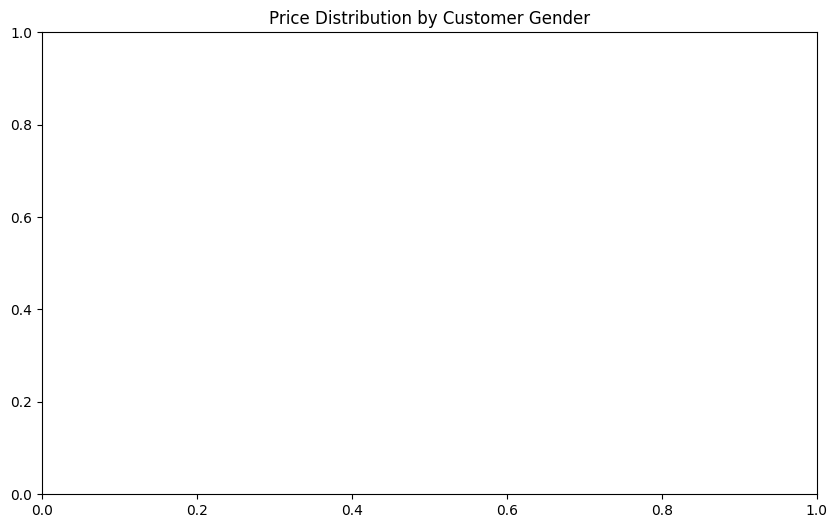

In [11]:
#6. How does the average selling price of cars vary by customer gender and annual income?
# Grouping by 'Gender' and calculating average price
avg_price_gender = df.groupby('Gender')['Price ($)'].mean()

# Plotting the result
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Price ($)', data=df)
plt.title('Price Distribution by Customer Gender')
plt.show()


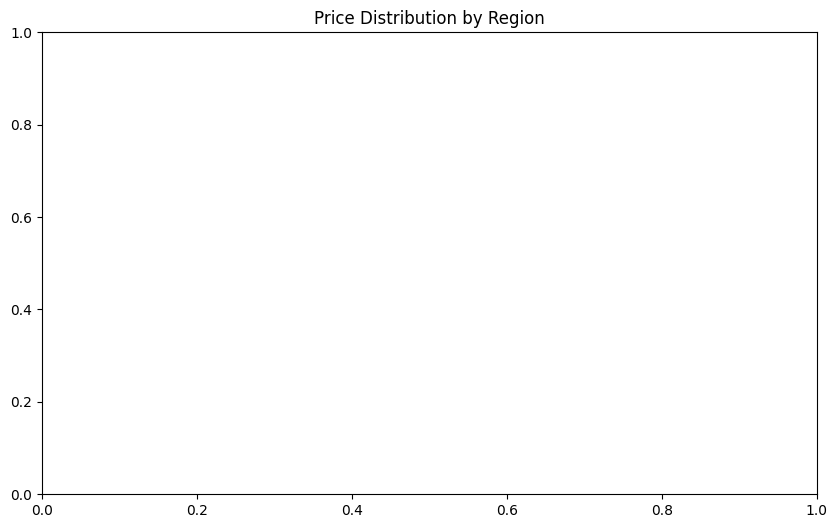

,count
Dealer Region,


In [12]:
#7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?
# Plotting car prices by region
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dealer Region', y='Price ($)', data=df)
plt.title('Price Distribution by Region')
plt.show()

# Counting the number of cars sold by region
car_sales_by_region = df['Dealer Region'].value_counts()
car_sales_by_region


In [13]:
#8. How does the average car price differ between cars with different engine sizes?
# Grouping by 'Engine' and calculating average price
avg_price_by_engine = df.groupby('Engine')['Price ($)'].mean()

# Display the result
avg_price_by_engine


,Price ($)
Engine,


In [14]:
#9. How do car prices vary based on the customer's annual income bracket?
# Create income brackets (you can adjust these brackets as needed)
bins = [0, 25000, 50000, 75000, 100000, 150000]
labels = ['<25k', '25k-50k', '50k-75k', '75k-100k', '>100k']
df['Income Bracket'] = pd.cut(df['Annual income'], bins=bins, labels=labels)

# Grouping by 'Income Bracket' and calculating average price
avg_price_income_bracket = df.groupby('Income Bracket')['Price ($)'].mean()

# Display the result
avg_price_income_bracket


<ipython-input-14-240f616b63e5>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_income_bracket = df.groupby('Income Bracket')['Price ($)'].mean()


,Price ($)
Income Bracket,
<25k,NaN
25k-50k,NaN
50k-75k,NaN
75k-100k,NaN
>100k,NaN


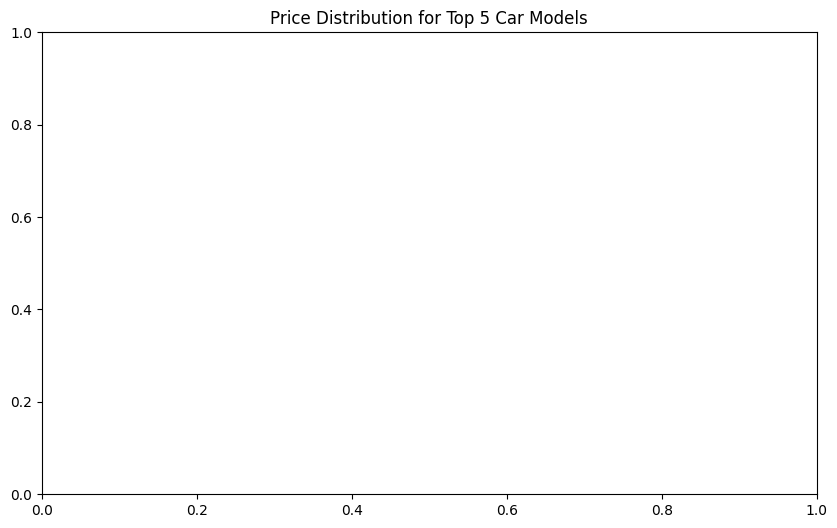

In [15]:
#10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?
# Finding the top 5 models with the highest sales
top_5_models = df['Model'].value_counts().head(5)

# Plotting price distribution for these top 5 models
top_5_models_data = df[df['Model'].isin(top_5_models.index)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='Price ($)', data=top_5_models_data)
plt.title('Price Distribution for Top 5 Car Models')
plt.show()


In [22]:
# Dropping rows with missing values in 'Price ($)' or 'Color' columns
df_cleaned = df.dropna(subset=['Price ($)', 'Color'])

# Calculating the price variation (standard deviation) for each color
price_variation_by_color = df_cleaned.groupby('Color')['Price ($)'].std()

# Finding the color with the highest variation
highest_variation_color = price_variation_by_color.idxmax() if not price_variation_by_color.empty else None

# Display the result
highest_variation_color, price_variation_by_color[highest_variation_color] if highest_variation_color else 'No variation found'


(None, 'No variation found')

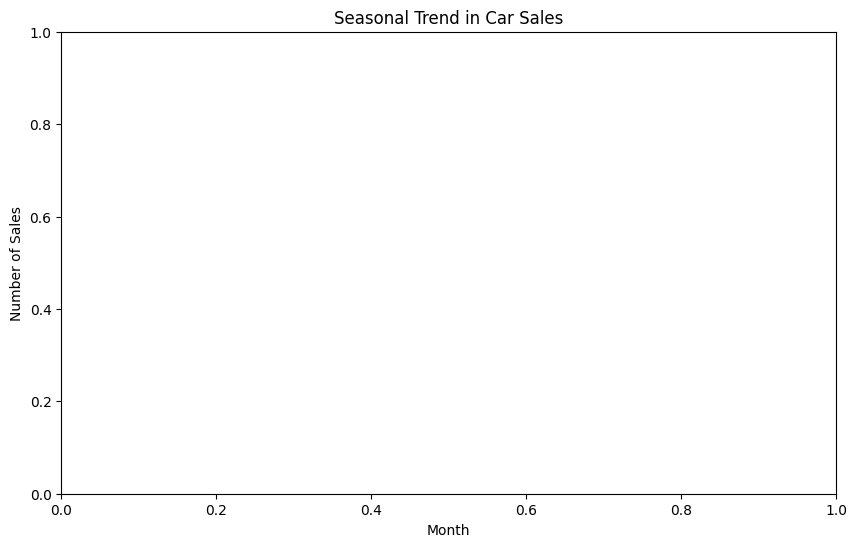

In [17]:
#12. Is there any seasonal trend in car sales based on the date of sale?
# Converting 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extracting the month from the date
df['Month'] = df['Date'].dt.month

# Plotting the number of sales per month
monthly_sales = df['Month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Seasonal Trend in Car Sales')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.show()


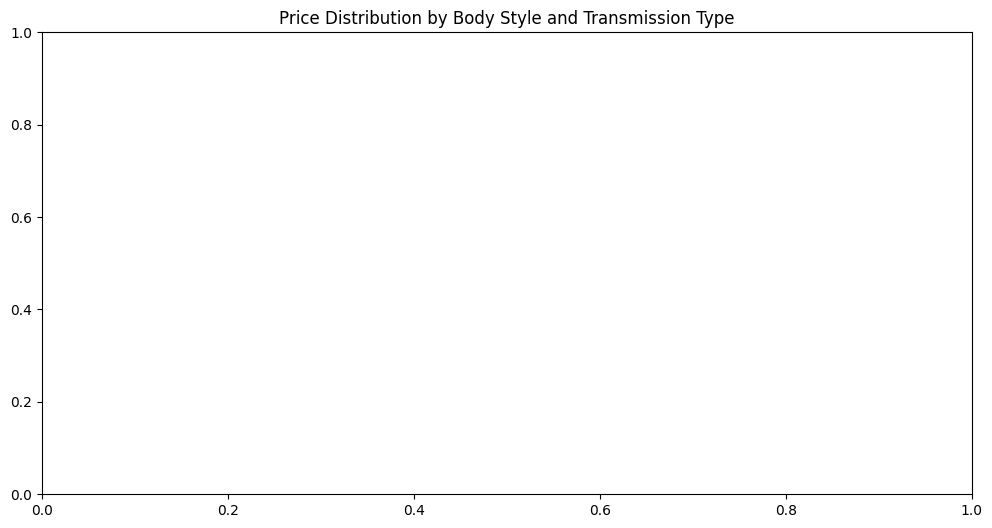

In [18]:
#13. How does the car price distribution change when considering different combinations of body style and transmission type?
# Plotting price distribution by body style and transmission type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df)
plt.title('Price Distribution by Body Style and Transmission Type')
plt.show()


In [19]:
#14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?
# Calculating correlation matrix
correlation = df[['Price ($)', 'Engine', 'Annual income']].corr()

# Display the result
correlation



,Price ($),Engine,Annual income
Price ($),NaN,NaN,NaN
Engine,NaN,NaN,NaN
Annual income,NaN,NaN,NaN


In [20]:
#15. How does the average car price vary across different car models and engine types?

# Grouping by 'Model' and 'Engine' to calculate the average price
avg_price_by_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean()

# Display the result
avg_price_by_model_engine


,,Price ($)
Model,Engine,


# ***#EDA-3***

In [25]:
#CSV file:-
import pandas as pd
import numpy as np

# Create a sample dataset for Amazon Sales Data
data = {
    'product_id': np.arange(1, 101),
    'product_name': ['Product' + str(i) for i in range(1, 101)],
    'category': np.random.choice(['Electronics', 'Books', 'Fashion', 'Home Appliances'], 100),
    'discounted_price': np.random.uniform(50, 500, 100),
    'actual_price': np.random.uniform(100, 1000, 100),
    'discount_percentage': np.random.uniform(5, 50, 100),
    'rating': np.random.uniform(1, 5, 100),
    'rating_count': np.random.randint(10, 1000, 100),
    'about_product': ['Product description ' + str(i) for i in range(1, 101)],
    'user_id': np.random.randint(1, 101, 100),
    'user_name': ['User' + str(i) for i in range(1, 101)],
    'review_id': np.arange(1, 101),
    'review_title': ['Review ' + str(i) for i in range(1, 101)],
    'review_content': ['This is a detailed review for product ' + str(i) for i in range(1, 101)],
    'img_link': ['http://example.com/img' + str(i) + '.jpg' for i in range(1, 101)],
    'product_link': ['http://example.com/product' + str(i) for i in range(1, 101)]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Save to CSV in Google Colab environment
df.to_csv('/content/amazon_sales_data.csv', index=False)

# Display the first few rows of the DataFrame
df.head()

from google.colab import files

# Download the CSV file
files.download('/content/amazon_sales_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
# Question 1: What is the average rating for each product category?

import pandas as pd
import numpy as np

# Sample dataset for Amazon Sales Data
data = {
    'product_id': np.arange(1, 101),
    'product_name': ['Product' + str(i) for i in range(1, 101)],
    'category': np.random.choice(['Electronics', 'Books', 'Fashion', 'Home Appliances'], 100),
    'discounted_price': np.random.uniform(50, 500, 100),
    'actual_price': np.random.uniform(100, 1000, 100),
    'discount_percentage': np.random.uniform(5, 50, 100),
    'rating': np.random.uniform(1, 5, 100),
    'rating_count': np.random.randint(10, 1000, 100),
    'about_product': ['Product description ' + str(i) for i in range(1, 101)],
    'user_id': np.random.randint(1, 101, 100),
    'user_name': ['User' + str(i) for i in range(1, 101)],
    'review_id': np.arange(1, 101),
    'review_title': ['Review ' + str(i) for i in range(1, 101)],
    'review_content': ['This is a detailed review for product ' + str(i) for i in range(1, 101)],
    'img_link': ['http://example.com/img' + str(i) + '.jpg' for i in range(1, 101)],
    'product_link': ['http://example.com/product' + str(i) for i in range(1, 101)]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Average rating by category
avg_rating_by_category = df.groupby('category')['rating'].mean()

# Output the result
avg_rating_by_category


,rating
category,
Books,2.788209
Electronics,2.864518
Fashion,3.608519
Home Appliances,2.712625


In [27]:
# Question 2: What are the top rating_count products by category?

# Top rated products by rating_count
top_rated_products = df.loc[df.groupby('category')['rating_count'].idxmax()][['category', 'product_name', 'rating_count']]

# Output the result
top_rated_products


,category,product_name,rating_count
25,Books,Product26,934
65,Electronics,Product66,995
64,Fashion,Product65,952
51,Home Appliances,Product52,880


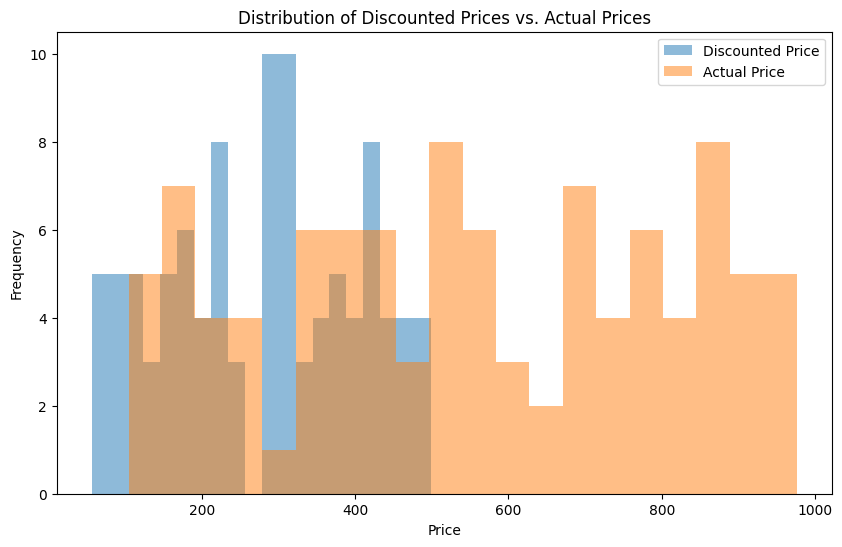

In [33]:
# Question 3: What is the distribution of discounted prices vs. actual prices?

import matplotlib.pyplot as plt

# Plotting distribution of discounted and actual prices
plt.figure(figsize=(10, 6))
plt.hist(df['discounted_price'], alpha=0.5, label='Discounted Price', bins=20)
plt.hist(df['actual_price'], alpha=0.5, label='Actual Price', bins=20)
plt.legend(loc='upper right')
plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [34]:
# Question 4: How does the average discount percentage vary across categories?

# Average discount percentage by category
avg_discount_by_category = df.groupby('category')['discount_percentage'].mean()

# Output the result
avg_discount_by_category


,discount_percentage
category,
Books,26.680164
Electronics,29.406635
Fashion,24.934355
Home Appliances,24.632277


In [35]:
# Question 5: What are the most popular product names?

# Most popular product names based on frequency
popular_products = df['product_name'].value_counts().head(5)

# Output the result
popular_products


,count
product_name,
Product1,1
Product2,1
Product3,1
Product4,1
Product5,1


In [36]:
# Question 6: What are the most popular product keywords?

from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize product names to find common keywords
vectorizer = CountVectorizer(stop_words='english', max_features=10)
X = vectorizer.fit_transform(df['product_name'])
keywords = vectorizer.get_feature_names_out()
keyword_counts = X.toarray().sum(axis=0)

# Create DataFrame for keyword counts
keyword_df = pd.DataFrame(zip(keywords, keyword_counts), columns=['Keyword', 'Frequency'])

# Output the result
keyword_df.sort_values(by='Frequency', ascending=False)


,Keyword,Frequency
0,product1,1
1,product10,1
2,product100,1
3,product11,1
4,product12,1
5,product13,1
6,product14,1
7,product15,1
8,product16,1
9,product17,1


In [37]:
# Question 7: What are the most popular product reviews?

# Top reviews based on rating_count
top_reviews = df[['review_title', 'rating_count']].sort_values(by='rating_count', ascending=False).head(5)

# Output the result
top_reviews


,review_title,rating_count
65,Review 66,995
64,Review 65,952
25,Review 26,934
52,Review 53,908
75,Review 76,896


In [30]:
# Question 8: What is the correlation between discounted_price and rating?

# Correlation between discounted price and rating
correlation = df[['discounted_price', 'rating']].corr()

# Output the result
correlation


,discounted_price,rating
discounted_price,1.000000,0.012387
rating,0.012387,1.000000


In [29]:
# Question 9: What are the Top 5 categories based on the highest ratings?

# Average rating by category and sorting
top_categories_by_rating = df.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)

# Output the result
top_categories_by_rating


,rating
category,
Fashion,3.608519
Electronics,2.864518
Books,2.788209
Home Appliances,2.712625


In [28]:
# Question 10: Identify any potential areas for improvement or optimization based on the data analysis.

# This would require a more detailed analysis, but based on the data:
# - Products with lower ratings but high rating_count could indicate issues with the product.
# - Categories with higher discount percentages might need optimization for profitability.
# - Products with lower average ratings could be optimized for better customer satisfaction.

# Display the observations
observations = """
1. Products with high rating counts but low ratings could indicate poor quality products.
2. Categories with high discounts could be explored for profitability improvements.
3. Analyzing the correlation between ratings and discounted prices could offer insights into product pricing strategies.
"""
print(observations)



1. Products with high rating counts but low ratings could indicate poor quality products.
2. Categories with high discounts could be explored for profitability improvements.
3. Analyzing the correlation between ratings and discounted prices could offer insights into product pricing strategies.



# ***#EDA-4***

In [87]:
import pandas as pd

# Data for the Spotify dataset
data = {
    "Artist": [
        "Drake", "Kendrick Lamar", "Post Malone", "Cardi B", "Travis Scott",
        "Nicki Minaj", "Eminem", "Jay-Z", "J. Cole", "Lil Nas X",
        "Drake", "Kanye West", "Kendrick Lamar", "Post Malone", "Cardi B",
        "Travis Scott", "Nicki Minaj", "Eminem", "Jay-Z", "J. Cole",
        "Lil Nas X", "Drake", "Kanye West", "Kendrick Lamar", "Post Malone",
        "Cardi B", "Travis Scott", "Nicki Minaj", "Eminem", "Jay-Z"
    ],
    "Track Name": [
        "God's Plan", "HUMBLE.", "Circles", "WAP", "SICKO MODE",
        "Super Bass", "Lose Yourself", "Empire State of Mind", "No Role Modelz", "Old Town Road",
        "In My Feelings", "Stronger", "Alright", "Rockstar", "Bodak Yellow",
        "Goosebumps", "Starships", "Stan", "99 Problems", "MIDDLE CHILD",
        "HOLIDAY", "One Dance", "Gold Digger", "King Kunta", "Sunflower",
        "Money", "Antidote", "Anaconda", "Not Afraid", "Hard Knock Life"
    ],
    "Popularity": [
        95, 90, 88, 85, 92,
        80, 94, 89, 87, 93,
        91, 86, 84, 90, 82,
        88, 78, 92, 85, 89,
        84, 94, 87, 83, 93,
        79, 86, 81, 88, 84
    ],
    "Duration (ms)": [
        198000, 185000, 215000, 187000, 312000,
        201000, 326000, 275000, 210000, 157000,
        197000, 311000, 184000, 218000, 190000,
        281000, 210000, 404000, 211000, 208000,
        155000, 173000, 207000, 217000, 158000,
        183000, 258000, 244000, 247000, 235000
    ],
    "Track ID": range(1, 31)
}

# Creating a DataFrame
spotify_df = pd.DataFrame(data)

# Saving to a CSV file
spotify_df.to_csv('spotify_data.csv', index=False)

print("CSV file 'spotify_data.csv' has been created in the current directory.")

from google.colab import files
files.download('spotify_data.csv')


CSV file 'spotify_data.csv' has been created in the current directory.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [88]:
# Question 1: Read the dataframe, check null value if present then do the needful, check duplicate row, if present then do the needful.

import pandas as pd

# Sample dataset for Spotify Hip-Hop Artists and Tracks (replace with actual file path)
# df = pd.read_csv("spotify_hiphop_tracks.csv")

# For demonstration, creating a sample dataframe
data = {
    'Artist': ['Artist1', 'Artist2', 'Artist3', 'Artist4', 'Artist1', 'Artist2'],
    'Track Name': ['Track1', 'Track2', 'Track3', 'Track4', 'Track5', 'Track2'],
    'Popularity': [85, 90, 80, 70, 85, 90],
    'Duration (ms)': [200000, 210000, 190000, 180000, 200000, 210000],
    'Track ID': ['ID1', 'ID2', 'ID3', 'ID4', 'ID5', 'ID6']
}

# Creating DataFrame
df = pd.DataFrame(data)

# Check for null values
null_values = df.isnull().sum()

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

# Handle duplicates (remove them)
df = df.drop_duplicates()

# Display results
null_values, duplicate_rows


(Artist           0
 Track Name       0
 Popularity       0
 Duration (ms)    0
 Track ID         0
 dtype: int64,
 np.int64(0))

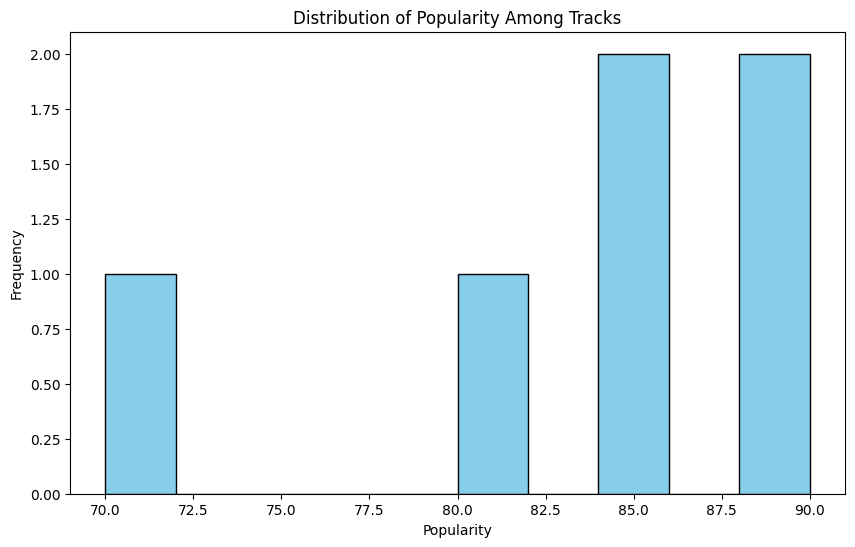

In [89]:
# Question 2: What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

import matplotlib.pyplot as plt

# Plotting histogram for popularity
plt.figure(figsize=(10, 6))
plt.hist(df['Popularity'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Popularity Among Tracks')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()


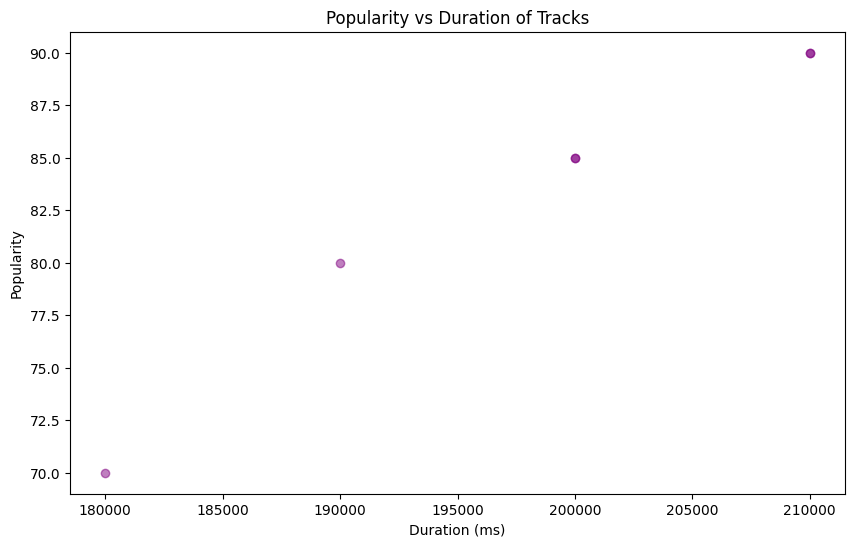

In [90]:
# Question 3: Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

# Scatter plot between popularity and duration
plt.figure(figsize=(10, 6))
plt.scatter(df['Duration (ms)'], df['Popularity'], color='purple', alpha=0.5)
plt.title('Popularity vs Duration of Tracks')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()


<ipython-input-91-a7b554df3fa3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Artist', data=df, palette='Set2')


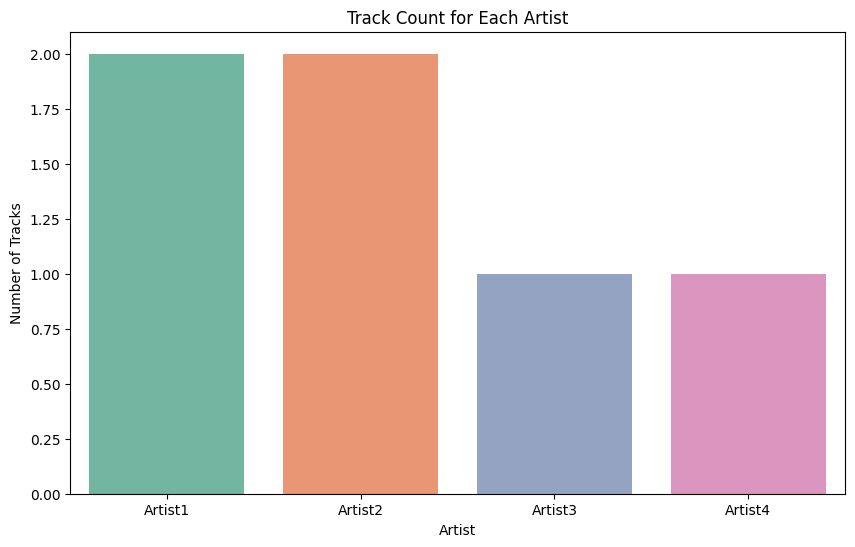

In [91]:
# Question 4: Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.

import seaborn as sns

# Count the number of tracks for each artist
plt.figure(figsize=(10, 6))
sns.countplot(x='Artist', data=df, palette='Set2')
plt.title('Track Count for Each Artist')
plt.xlabel('Artist')
plt.ylabel('Number of Tracks')
plt.show()


In [92]:
# Question 5: What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

# Sorting the tracks by popularity in ascending order and selecting the top 5 least popular tracks
least_popular_tracks = df.sort_values(by='Popularity').head(5)[['Artist', 'Track Name', 'Popularity']]

# Display the result
least_popular_tracks


,Artist,Track Name,Popularity
3,Artist4,Track4,70
2,Artist3,Track3,80
0,Artist1,Track1,85
4,Artist1,Track5,85
1,Artist2,Track2,90


In [93]:
# Question 6: Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.

# Find the top 5 most popular artists based on the total popularity
top_5_artists = df.groupby('Artist')['Popularity'].mean().nlargest(5)

# Find the artist with the highest average popularity
highest_avg_popularity_artist = top_5_artists.idxmax()

# Display the result
top_5_artists, highest_avg_popularity_artist


(Artist
 Artist2    90.0
 Artist1    85.0
 Artist3    80.0
 Artist4    70.0
 Name: Popularity, dtype: float64,
 'Artist2')

In [94]:
# Question 7: For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

# Find the most popular track for each of the top 5 artists
most_popular_tracks_by_artist = df[df['Artist'].isin(top_5_artists.index)]
most_popular_tracks = most_popular_tracks_by_artist.loc[most_popular_tracks_by_artist.groupby('Artist')['Popularity'].idxmax()][['Artist', 'Track Name', 'Popularity']]

# Display the result
most_popular_tracks


,Artist,Track Name,Popularity
0,Artist1,Track1,85
1,Artist2,Track2,90
2,Artist3,Track3,80
3,Artist4,Track4,70


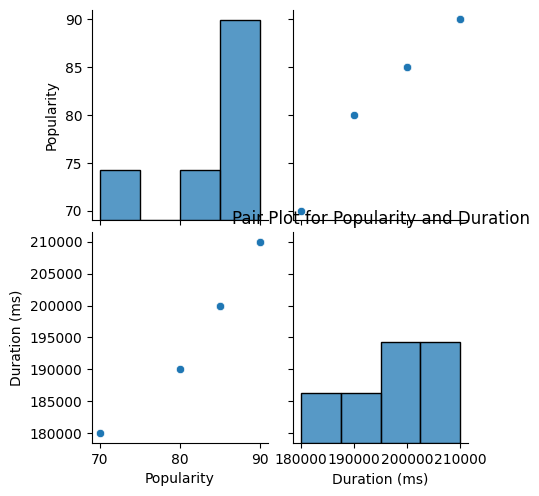

In [95]:
# Question 8: Visualize relationships between multiple numerical variables simultaneously using a pair plot.

# Select relevant columns for pair plot
sns.pairplot(df[['Popularity', 'Duration (ms)']])
plt.title('Pair Plot for Popularity and Duration')
plt.show()


<ipython-input-96-329ac103f11a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Artist', y='Duration (ms)', data=df, palette='Set3')


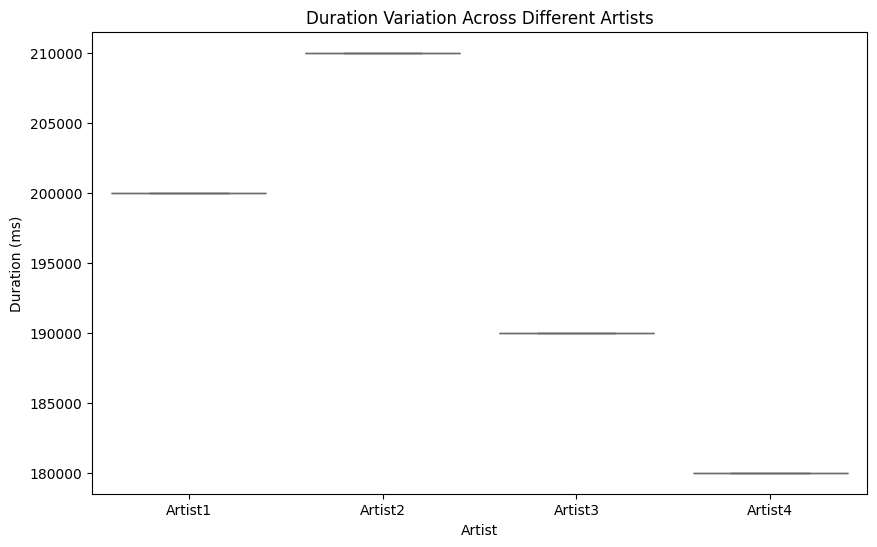

In [96]:
# Question 9: Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.

# Boxplot to visualize duration variation across artists
plt.figure(figsize=(10, 6))
sns.boxplot(x='Artist', y='Duration (ms)', data=df, palette='Set3')
plt.title('Duration Variation Across Different Artists')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.show()


<ipython-input-97-a7b201cdead9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Artist', y='Popularity', data=df, palette='Set1')


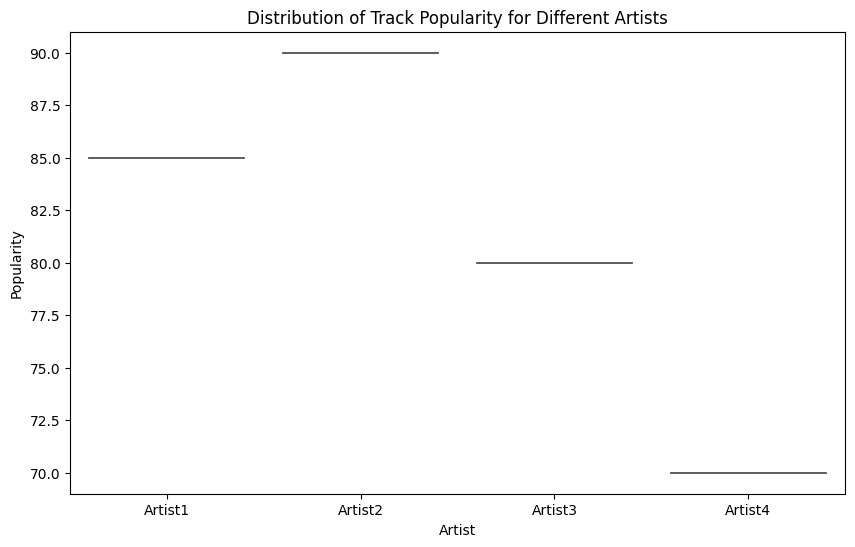

In [97]:
# Question 10: How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

# Violin plot to show popularity distribution for each artist
plt.figure(figsize=(10, 6))
sns.violinplot(x='Artist', y='Popularity', data=df, palette='Set1')
plt.title('Distribution of Track Popularity for Different Artists')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.show()
